# Neural Networks

#### Linear Perceptron (or Artificial Neuron)
- In practice, a linear combination of weighted inputs
    
    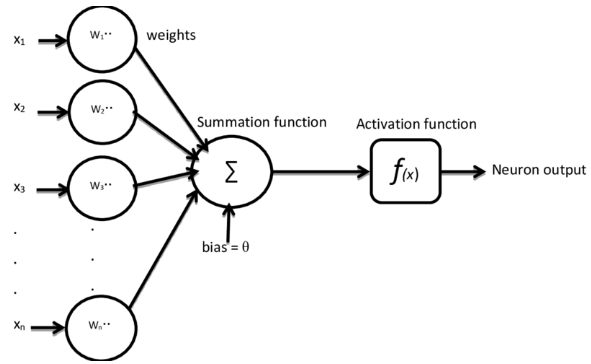
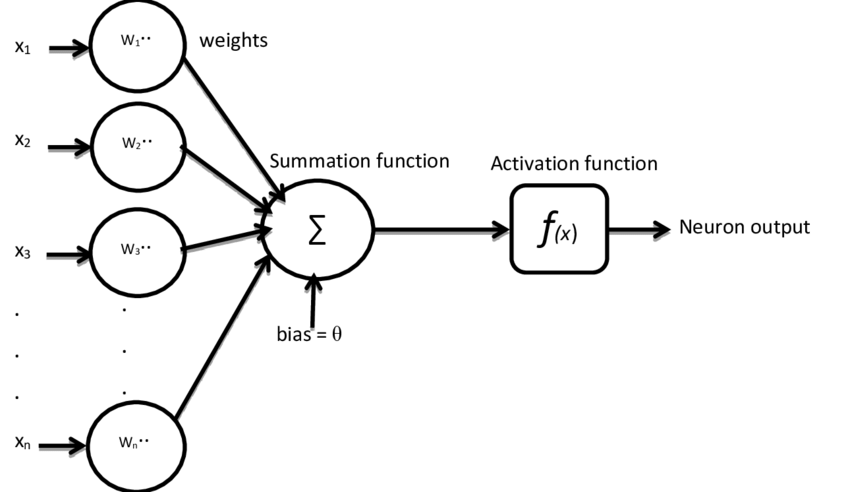
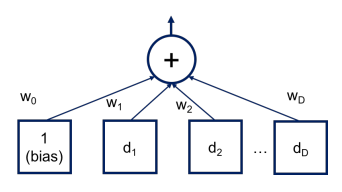

## Feed-forward Neural Networks or Multilayer Perceptrons (MLPs)
- A Neural Network is an arrangement of many perceptrons–like elements in a hierarchical structure.
- A layer of the neural network is a series of neurons that act in parallel. 
- The number of hidden layers + the output layer form the NN total number of layers.
    - The input feeds the *input layer*: 
        - one node for each dimension of the input
        - the input has a size of 1 row, multiple rows (**batch**) or the entire dataset. Therefore each input node contains a column (or part of it) of the dataset.
    - The input layer feeds the *hidden layers*: the number of nodes is a hyperparameter
    - The hidden layers feed  an *output layer*: one node if there are two classes (0/1); one node per class otherwise

    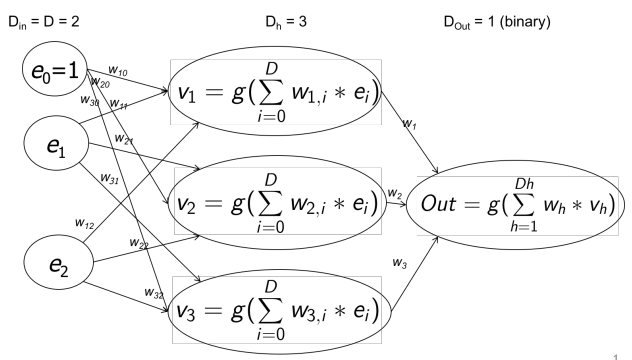

- Each hidden/output-layer neuron:
    1. receives as input a data (a signal, a real number)
    2. processes it, by multiplying by a weight plus a bias vector (which are specific to each neuron): $z=w^Tx+b$
    3. sums all the processed input data
    4. applies an element-wise nonlinear *activation function* $g(z)$
- Feed-forward means each node of one layer is connected to all the nodes of the following layer: in this way the signal flows from the input to the output, without loops

### Deep Neural Network
- The difference between a Neural Network and a Deep Neural Network is that the former consists of a single layer of neurons, while the latter is composed of multiple layers of neurons. In other words, a DNN has at least three layers.

    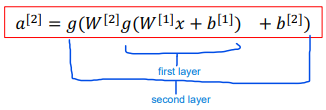

---
## Activation Function
- It's like passing data through a threshold
    - ***ReLU*** (Rectified Linear Unit)
        - $g(z)= max\{0, z\}$ 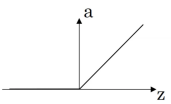
        - It's faster for training than others
        - The drawback is that the derivative is 0 when the value is negative
        - ReLU simplifies the space of activations because projects the data on the positive axes

        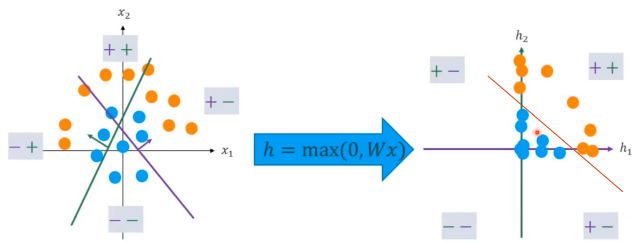
    
    - **Softmax**
        - used as activation function for the output layer of a multi-classification problem
        - the entire vector sums to 1 so that it represents a valid probability distribution
    - **sigmoid** ]0,1[ 
        - used as activation function for the output layer of a binary classification problem
    - **arctangent** ]-1.5,1.5[ 
        - works better than the sigmoid as activation of the hidden layers, because it's antisymmetric: if the network connectivity is large, backpropagation learning with antisymmetric activation functions can yield faster convergence than non-antisymmetric.
- The problem with sigmoid and arctangent is that when the value is too small or too large the derivative becomes really small and gradient descent slows down. Their use as activation functions for hidden units in feedforward networks is now discouraged.

- A linear activation function (therefore a linear neuron) is very affected by noise: $f(x_1+x_2) = f(x_1)+f(x_2)$. If $x_2$ is generated by noise, it is completely transferred to the output. In a non–linear system, in general, $f(x_1+x_2) \ne f(x_1)+f(x_2)$

---
## Cost/Loss Function
- As in other supervised learning algorithms, the data is described by the function $y=f(x;\theta)$, where $\theta$ is a parameter. 
- The Neural Networks generate a function $\hat{y}$ where $\theta = \{W, b\}$
- FOR CLASSIFICATION: the Neural Networks define a distribution $P(y_i| x_i;\theta)$, that's the probability of output $y_i$ given the sample $x_i$ with parameters $\theta$
    - The *Likelihood function* (over all $N$ the samples) is defined as 
    <br>$L(\hat{y},y)=\prod_{1}^{N}P(y_i| x_i;\theta)$, which is taken as *negative log-likelihood*: 
    <br>$L(\hat{y},y)=-\sum_{i=1}^{N}log\space P(y_i| x_i;\theta)$
    <br>that becomes the *Cross-Entropy* <sup>[(proof)](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#Relation_to_minimizing_Kullback%E2%80%93Leibler_divergence_and_cross_entropy)</sup> between the training data and the model's predictions: 
        - for Multi-class Classification (over one sample $x_i$):  $$L(\hat{y_i},y_i)_{multi}=-\sum_{c=1}^{C}y_c * log(\hat{y_c})$$
        - for Binary Classification (over one sample $x_i$):
    $$L(\hat{y_i}, y_i)_{binary} = -(y * log(\hat{y}) + (1 - y) * log(1 - \hat{y}))$$
- FOR REGRESSION: the Likelihood (of ona sample $x_i$) can simply be the MSE between $\hat{y_i},y_i$
<br>

- The Loss Function is the mean over all the samples: $$J(W,b)=\frac{1}{n}\sum_{i=1}^{N}L(\hat{y_i}, y_i)$$

- We are trying to obtain the weights that minimize the Loss Function: $$\hat{\theta} = \argmin_{\theta}J(\theta)$$

## Gradient Descent
- Neural networks are usually trained using iterative and gradient-based optimizers that drive the cost function to a very low value

- To try to reach the global minimum of the error function, it's necessary to calculate its derivatives, going backwards through the NN, and updating the weights to decrease the total error.

- It's used the derivative of the loss function because: (as $f$ the loss function) it gives the slope of $f(x)$ at the point $x$, and it tells how to change $x$ to make a small improvement in $f(x)$: $f(x+\epsilon)=f(x)+\epsilon f'(x)$

- The weights are changed by subtracting the partial derivative multiplied by a *learning rate* $\alpha$ constant. The learning rate influences the convergence speed and can be adjusted as a tradeoff between speed and precision. $$w = w-\alpha * \frac{\partial J(w,b)}{\partial w}$$ $$b = b-\alpha * \frac{\partial J(w,b)}{\partial b}$$

- Of course, the gradient descent stops if the weights change no more, that's when the derivative is zero.

- The convergence point of gradient descent depends on the initial values of the parameters
- For feedforward neural networks, it is important to:
    - initialize all weights to small random values (there are several techniques for initialization)
    - initialize biases to zero or small positive values
- To apply gradient-based learning we must choose:
    - a cost function
    - how to represent the output of the model

## Back-propagation
- The Back-propagation algorithm is an actual neural network in which each neuron computes a derivative. It allows the information from the cost to flow backward through the network, in order to compute the gradient
    - it refers only to the method for computing the gradient
    - learning is performed using this gradient with, for example, gradient descent
- That's why the network is much more time-consuming during the training phase.

- Since our training set is composed by multiple samples, the derivatives must be computed over each sample and the final update quantity must be averaged over the number of samples. It is possible to exploit vectorization for all these computations, both forward and backward, allowing for faster processing: usage of graphical processing unit (GPU)
- **Epoch**: a learning round over all the samples of the network. In general, after each epoch the network classification capability will be improved

## Stochastic Gradient Descent
- SGD is an iterative method for optimizing an objective function for very large datasets.
- It’s a stochastic approximation of gradient descent optimization, replacing the actual gradient with an estimate calculated from a randomly selected subset of the data.
- Suitable for larger datasets, as it updates the model’s parameters more frequently:
    - "Stochastic" is 1 forward and immediately 1 backward
    - "Minibatch" is an arbitrary number of samples, typically a power of 2 for GPU parallelization (the cost function is divided by the size of the minibatch, instead of $N$). Generally yields faster and more stable descent toward the local minimum, since the update is performed in the direction of the average error
- Reduces the chance of getting stuck in a local minimum
- The solutions found may be less accurate or stable due to the randomness in the gradient approximation. It may be a little noisier as a process because overall the error calculated from a minibatch may be higher than the one from the whole training set.
- If you have a small training size (<=2000) and a limited number of variables you can use gradient descent
- *One epoch corresponds to having observed the whole training set one time*

---
## DNN Architecture
- Deeper networks often are able to use far fewer units per layer and far fewer parameters and often generalize to the test set, but are also often harder to optimize
- The ideal network architecture for a task must be found via experimentation guided by monitoring the validation set error
- Universal Approximation Theorem: regardless of what function we are trying to learn, we know that a large MLP will be able to represent this function.  Unfortunately, in the worst case, an exponential number of hidden units (possibly with one hidden unit corresponding to each input configuration that needs to be distinguished) may be required.
- Empirically, greater depth does seem to result in better generalization for a wide variety of tasks
- Given a very deep neural network composed of several layers, during forward or backward passes:
    - if we perform several multiplications for small weights -> *Vanishing gradient*: the network requires a longer time to train
    - if we perform several multiplications for large weights -> *Exploding gradient*
- What do we do in case of high bias?
    - *Bigger network*
    - *Longer training*
    - Different architectures
- What do we do in case of high variance?
    - *More data*
    - *Regularization*
    - *Early stopping*: while training, also observe the error on the valuation set and select the model that generalized better on the valuation set
    - Different architectures

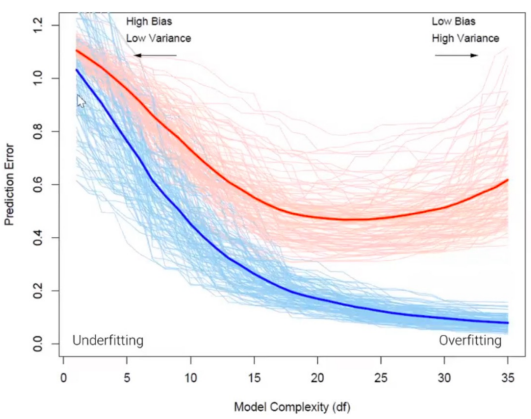


---
## Regularization (in case of high variance)
 - “Any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error”
### L2 Regularization
- The regularization prevents overfitting by *inhibiting the contribution of some neurons*, by adding a parameter norm penalty to the loss function that will modify the derivatives on backpropagation (*weight decay*)
$$J(W, b) = \text{...usual...} + \frac{\lambda}{2n} \sum_{l=1}^{L} ||W^{[l]}||^2_F$$
- $\lambda$ is a hyperparameter to find over the validation set. With large $\lambda$ the weights are close to zero and the model becomes simpler (potentially with higher bias)

### Dropout Regularization
- Different (non-output) neurons are *disabled at each minibatch* (forward and backward passes), focusing each iteration on different (smaller) subnetworks, spreading the weights.
- For each layer in the network you need to choose a probability of not considering some of the weights (neuron connections). For example, 50% means not considering 50% of the neurons of that layer.

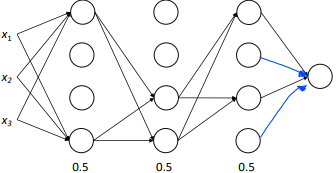

- This way the network is forced to use all the nodes, discovering possibly different patterns.
    - For layers with many weights use a large dropout probability: it helps prevent overfitting
    - For layers with a small number of weights use a lower dropout probability
- At test time the dropout is not applied, otherwise the results would change at every forward pass

---
## Optimizers
- The Stochastic Gradient Decent doesn't take advantage of the history of its descent, resulting in a very noisy (and sometimes very slow) descent.

### Momentum
- Designed to accelerate learning, especially in the face of high curvature, small but consistent gradients, or noisy gradients.
- Momentum smooths the step of the gradient descent in its path to the minimum (less zigzag movement). The step size is largest when many successive gradients point in the same direction
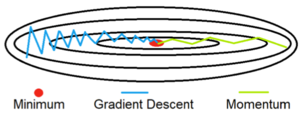
- The momentum algorithm accumulates an exponentially-decaying-moving average (EMA) of past gradients and continues to move in their direction.
    - the moving average ($v$) is the average of all the past gradients until that moment, which assigns a greater weight to the most recent values.
    - Compute new gradient $ \frac{\partial J(\ldots)}{\partial W^{[l]}} $ e $ \frac{\partial J(\ldots)}{\partial b^{[l]}} $  for the current minibatch
    - Compute the new running average as the past average plus the new gradient, weighted with the $\beta$ hyperparameter:
        - $ v_{W^{[l]}} = \beta v_{W^{[l]}} + (1-\beta) \frac{\partial J(\ldots)}{\partial W^{[l]}} $
        - $ v_{b^{[l]}} = \beta v_{b^{[l]}} + (1-\beta) \frac{\partial J(\ldots)}{\partial b^{[l]}}$
            - if $\beta=0.9$ means the past 10 computations are weighted $0.9$ and the current is weighted $0.1$; $\beta=0.99$ means the past 100 computations are weighted $0.99$ and the current is weighted $0.01$; ... 
    - Update the NN parameters:
        - $ W^{[l]} = W^{[l]} - \alpha v_{W^{[l]}}$
        - $ b^{[l]} = b^{[l]} -  \alpha v_{b^{[l]}}$
- $\beta$ usually set to 0.9 or 0.99

### RMSprop
- Root Mean Square Propagation uses an exponentially-decaying-moving average to discard history from the extreme past so that it can converge rapidly
- RMSprop updates the parameters in such a way that the movement in the direction of weights $W$ is more than the movement in the direction of $b$: this allows to take more large steps in the horizontal direction and converge faster, and it also decreases the number of iteration to converge to the optimal value.
    - Compute the new running average:
        - $s_{W^{[l]}} = \beta s_{W^{[l]}} + (1 - \beta) \left( \frac{\partial J(...)}{\partial W^{[l]}} \right)^2$
        - $s_{b^{[l]}} = \beta s_{b^{[l]}} + (1 - \beta) \left( \frac{\partial J(...)}{\partial b^{[l]}}  \right)^2$
    - Update the NN parameters:
        - $W^{[l]} = W^{[l]} - \alpha \frac{\frac{\partial J(...)}{\partial W^{[l]}}}{(\sqrt{s_{W^{[l]}}} + \epsilon)}$
        - $b^{[l]} = b^{[l]} -  \alpha  \frac{\frac{\partial J(...)}{\partial b^{[l]}}}{(\sqrt{s_{b^{[l]}}} +  \epsilon)}$
            - with $\epsilon$ a very small constant
- $\beta$ usually set to 0.9 or 0.99

### Adam
- "Adam is RMSProp with Momentum", meaning that the updates are directly estimated using a running average of RMSProp and Momentum of the gradient.
- It is known for its ability to handle sparse gradients on noisy problems and adapt its learning rate for each parameter, making it a versatile and effective tool.
    - Compute the new running average:
        - $v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1-\beta_1) \frac{\partial J(\ldots)}{\partial W^{[l]}}$
        - $v_{b^{[l]}} = \beta_1 v_{b^{[l]}} + (1-\beta_1) \frac{\partial J(\ldots)}{\partial b^{[l]}}$
        - $s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) \left( \frac{\partial J(...)}{\partial W^{[l]}} \right)^2$
        - $s_{b^{[l]}} = \beta_2 s_{b^{[l]}} + (1 - \beta_2) \left( \frac{\partial J(...)}{\partial b^{[l]}}  \right)^2$
    - Step of "bias correction": $\beta_{1,2}^t$ is the previous $\beta$ to the power of $t$, where $t$ is the number of iterations until that moment. We divide the factor $(1-\beta^t)$ because it's inside the momentum and it's quickly progressing to zero as beta is increasing.
        - $v_{W^{[l]}}'=\frac{v_{W^{[l]}}}{(1 - \beta_1)}$
        - $v_{b^{[l]}}'=\frac{v_{b^{[l]}}}{(1 - \beta_1)}$
        - $s_{W^{[l]}}'=\frac{s_{W^{[l]}}}{(1 - \beta_2)}$
        - $s_{b^{[l]}}'=\frac{s_{b^{[l]}}}{(1 - \beta_2)}$
    - Update the NN parameters:
        - $W^{[l]} = W^{[l]} - \alpha \frac{v_{W^{[l]}}}{(\sqrt{s_{W^{[l]}}'} + \epsilon)}$
        - $b^{[l]} = b^{[l]} -  \alpha  \frac{v_{b^{[l]}}}{(\sqrt{s_{b^{[l]}}'} + \epsilon)}$
            - with $\epsilon$ a very small constant
- $\beta_1$ usually set to 0.9 and $\beta_2$ usually set to 0.999

---
## Learning rate decay
- As the training goes on, we may want to reduce the update that we make to the weights and bias, setting the learning rate to a progressively small value. This results in smaller and smaller steps, for example to get out a local minimum. The downside of course is that it takes more time.
- The common method is the following: *at each epoch* "$e$", the learning rate $\alpha$ decreases a bit, controlled by the *decay rate* "$\delta$"
    - $\alpha_e = \frac{1}{1+\delta e}\alpha_{e-1}$

---
## Batch Normalization
- *Internal covariate shift*: the change of means and variances (in general, the distribution) of the data given as input to the layers. Each layer of a neural network has inputs with a corresponding distribution in space, which is affected during the training process by the randomness in the parameter initialization and the randomness in the input data. It's a problem because the layers need to constantly readjust to new distributions. This problem is especially severe for deep networks because small changes in shallower hidden layers will be amplified as they propagate within the network, resulting in significant shifts in deeper hidden layers.

- Batch Normalization applies normalization (in the training process) to each mini-batch of each layer's *inputs* (not on the output-layer). Ideally, the normalization would be conducted over the entire training set, but to use this step jointly with Stochastic Optimization methods, it is impractical to use the global information.

- The normalization is applied this way:
    - For each minibatch, for each layer:
    - calculate the mean and variance of the layer's input vector
    - update the layer's input vector, subtracting the mean and dividing by variance.
    - Scale and Shift: multiply the normalized values (each element) by a factor, *gamma*, and add to it a factor, *beta*. Those are parameters learnable from the neural network

- Other benefits:
    - the network can use a higher learning rate without vanishing or exploding gradients, speeding up the learning
    - has a slight regularization effect, helping with overfitting

- Practically, the Batch Normalization is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

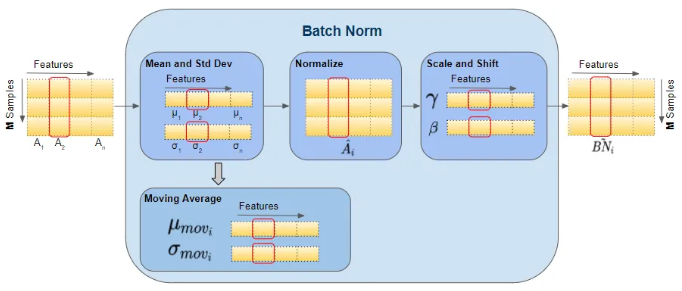

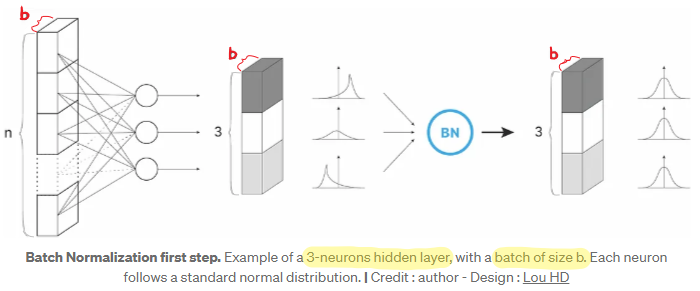